In [2]:
from robust import *

In [3]:
graph = prep_graph(file="datasets/karate.gml", file_format="gml")

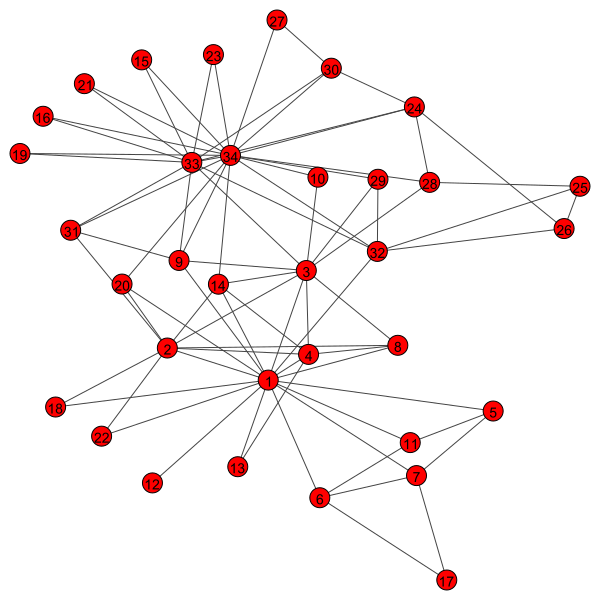

In [34]:
layout_1 = graph.layout_kamada_kawai()
plot = ig.plot(graph, layout=layout_1)
plot.save("__report__/base_graph.png")
plot

In [5]:
graph_random = random(graph.copy())

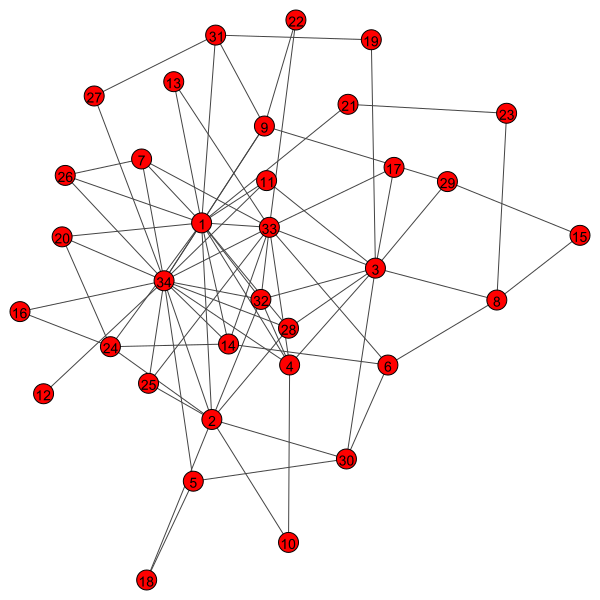

In [33]:
layout_2 = graph_random.layout_kamada_kawai()
plot = ig.plot(graph_random, layout=layout_2)
plot.save("__report__/random_graph.png")
plot

In [41]:
base_communities = method_community(graph=graph, method="optimal")
null_communities = method_community(graph=graph_random, method="optimal")

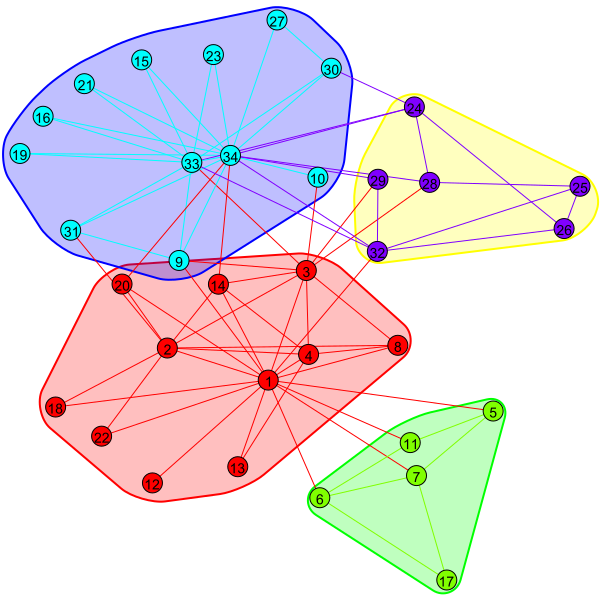

In [42]:
# Create a color dictionary
num_communities = max(base_communities.membership) + 1
palette = ig.RainbowPalette(n=num_communities)
color_dict = {i: palette.get(i) for i in range(num_communities)}

# Plot the graph with the communities
visual_style_1 = {}

# Set the layout as the calculated layout
visual_style_1["layout"] = layout_1

# Set the vertex color based on the communities
visual_style_1["vertex_color"] = [color_dict[base_communities.membership[v]] for v in range(len(graph.vs))]

# Set the edge color based on the source vertex's community membership
visual_style_1["edge_color"] = [color_dict[base_communities.membership[graph.es[e].source]] for e in range(len(graph.es))]

plot = ig.plot(base_communities, mark_groups=True, **visual_style_1)
plot.save("__report__/null_communities.png")
plot

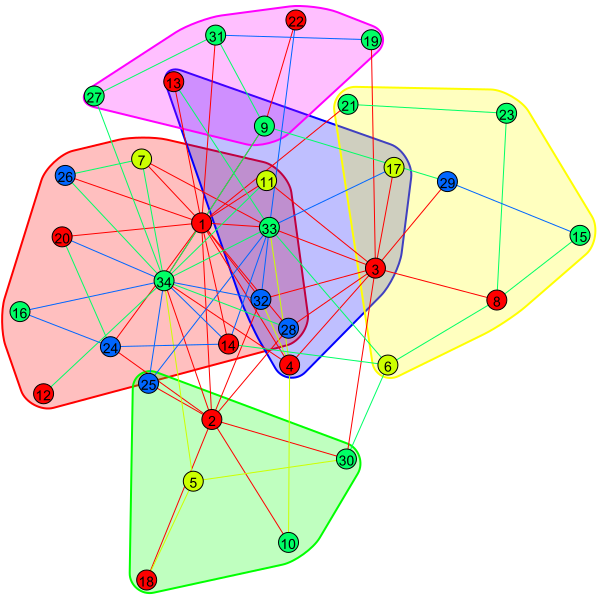

In [43]:
# Create a color dictionary
num_communities = max(null_communities.membership) + 1
palette = ig.RainbowPalette(n=num_communities)
color_dict = {i: palette.get(i) for i in range(num_communities)}

# Plot the graph with the communities
visual_style_2 = {}

# Set the layout as the calculated layout
visual_style_2["layout"] = layout_2

# Set the vertex color based on the communities
visual_style_2["vertex_color"] = [color_dict[base_communities.membership[v]] for v in range(len(graph.vs))]

# Set the edge color based on the source vertex's community membership
visual_style_2["edge_color"] = [color_dict[base_communities.membership[graph.es[e].source]] for e in range(len(graph.es))]

plot = ig.plot(null_communities, mark_groups=True, **visual_style_2)
plot.save("__report__/null_communities.png")
plot

In [44]:
base_membership = base_communities.membership #* base_membership = membership_communities(graph=graph, method="optimal")
null_membership = null_communities.membership #* null_membership = membership_communities(graph=graph_random, method="optimal")
print("Base Membership: ", base_membership)
print("Null Membership: ", null_membership)

Base Membership:  [0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2]
Null Membership:  [0, 1, 2, 2, 1, 3, 0, 3, 4, 1, 0, 0, 2, 0, 3, 0, 2, 1, 4, 0, 3, 4, 3, 0, 1, 0, 4, 0, 3, 1, 4, 2, 2, 0]


0.0


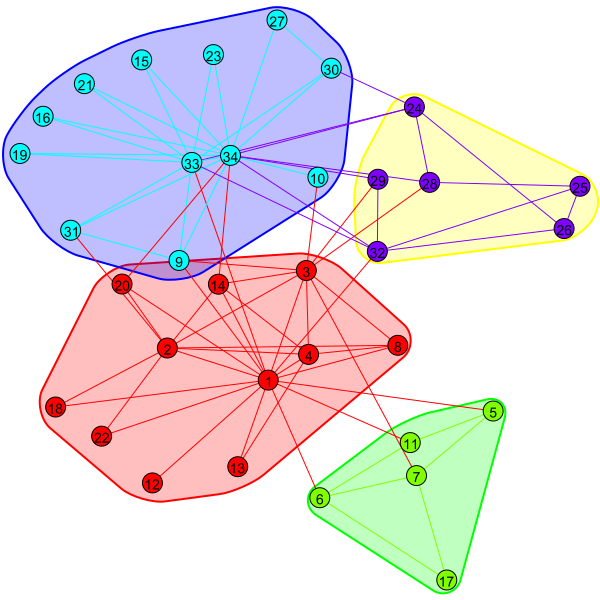

In [46]:
rewire_compl_test = rewire_compl(data=graph, number=1, community=base_membership, method="optimal", measure="vi")
print(rewire_compl_test['Measure'])
rewire_test_communities = method_community(graph=rewire_compl_test['graph_rewire'], method="optimal")
plot = ig.plot(rewire_test_communities, mark_groups=True, **visual_style_1)
plot

In [12]:
#rewire_onl_test = rewire_onl(graph=graph, trials=1)
#ig.plot(rewire_onl_test)

In [13]:
#robust_output = robin_robust(graph=graph, graph_random=graph_random)
#for item in robust_output: print(item, "\n", robust_output[item], "\n")

In [14]:
#robust_output = robin_robust(graph=graph, graph_random=graph_random, measure="vi", method="louvain", type="independent")
#plot_robin(graph, robust_output["Mean"], robust_output["MeanRandom"], legend=("real data", "null model"))

In [15]:
#compare_output = robin_compare(graph=graph)
#plot_robin(graph, compare_output["Mean1"], compare_output["Mean2"], legend=("Louvain", "Fast Greedy"))